# Compressing images with Discrete Cosine Basis

In [1]:
%matplotlib inline
import numpy as np
import scipy.fftpack
import scipy.misc
import matplotlib.pyplot as plt
plt.gray()

<Figure size 640x480 with 0 Axes>

In [2]:
# Two auxiliary functions that we will use. You do not need to read them (but make sure to run this cell!)

def dct(n):
    return scipy.fftpack.dct(np.eye(n), norm='ortho')

def plot_vector(v, color='k'):
    plt.plot(v,linestyle='', marker='o',color=color)

## 5.3.1 The canonical basis

The vectors of the canonical basis are the columns of the identity matrix in dimension $n$. We plot their coordinates below for $n=8$.

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


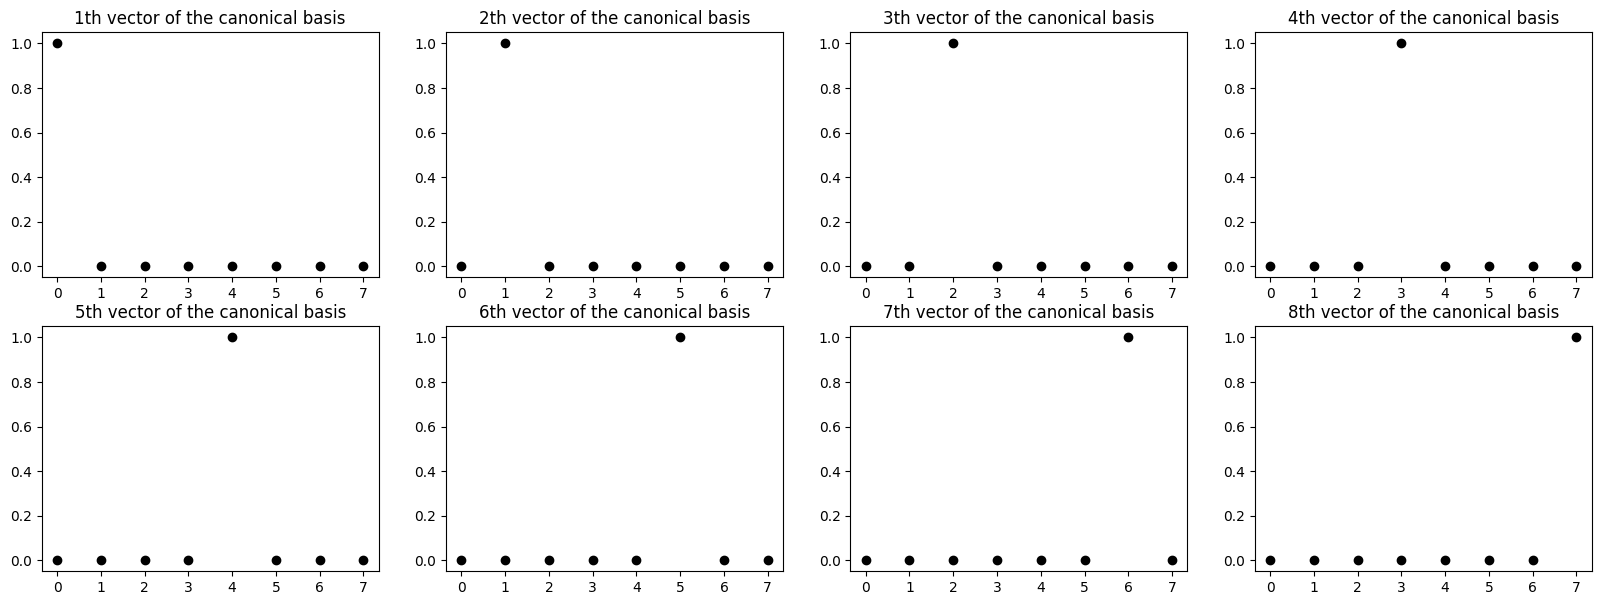

In [3]:
identity = np.identity(8)
print(identity)

plt.figure(figsize=(20,7))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(f"{i+1}th vector of the canonical basis")
    plot_vector(identity[:,i])

## 5.3.2 Discrete Cosine basis

The discrete cosine basis is another basis of $\mathbb{R}^n$. The function `dct(n)` outputs a square matrix of dimension $n$ whose columns are the vectors of the discrete cosine basis.

[[ 0.354  0.49   0.462  0.416  0.354  0.278  0.191  0.098]
 [ 0.354  0.416  0.191 -0.098 -0.354 -0.49  -0.462 -0.278]
 [ 0.354  0.278 -0.191 -0.49  -0.354  0.098  0.462  0.416]
 [ 0.354  0.098 -0.462 -0.278  0.354  0.416 -0.191 -0.49 ]
 [ 0.354 -0.098 -0.462  0.278  0.354 -0.416 -0.191  0.49 ]
 [ 0.354 -0.278 -0.191  0.49  -0.354 -0.098  0.462 -0.416]
 [ 0.354 -0.416  0.191  0.098 -0.354  0.49  -0.462  0.278]
 [ 0.354 -0.49   0.462 -0.416  0.354 -0.278  0.191 -0.098]]


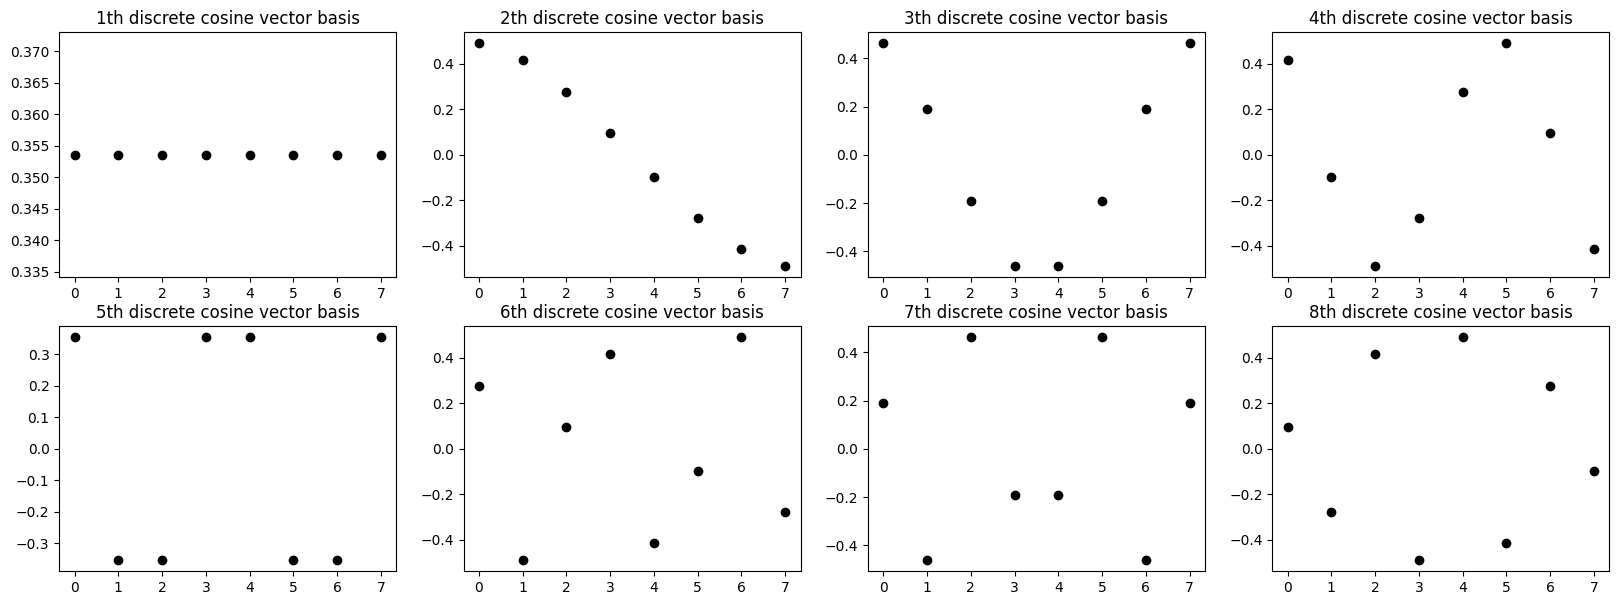

In [4]:
# Discrete Cosine Transform matrix in dimension n = 8
D8 = dct(8)
print(np.round(D8,3))

plt.figure(figsize=(20,7))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(f"{i+1}th discrete cosine vector basis")
    plot_vector(D8[:,i])

**5.3 (a)** Check numerically (in one line of code) that the columns of `D8` are an orthonormal basis of $\mathbb{R}^8$ (ie verify that the discrete cosine basis is an orthonormal basis).

In [13]:
# Your answer here
D8.T @ D8 == np.eye(8)

array([[False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True, False,  True,  True],
       [ True, False, False,  True,  True,  True,  True, False],
       [ True, False,  True, False,  True, False,  True, False],
       [ True,  True,  True,  True, False,  True, False, False],
       [ True, False,  True, False,  True, False, False, False],
       [ True,  True,  True,  True, False, False,  True, False],
       [ True,  True, False, False, False, False, False, False]])

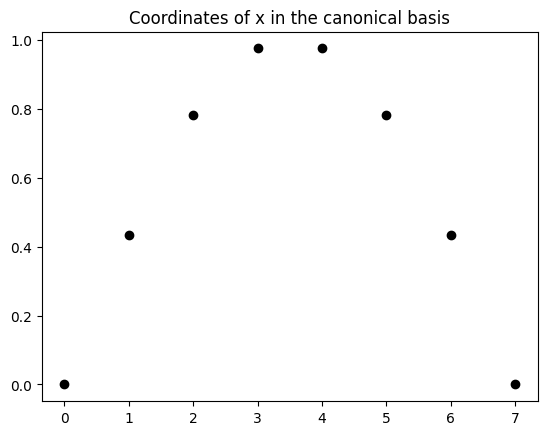

In [14]:
# Let consider the following vector x 
x = np.sin(np.linspace(0,np.pi,8))
plt.title('Coordinates of x in the canonical basis')
plot_vector(x)

**5.3 (b)** Compute the vector $v \in \mathbb{R}^8$ of DCT coefficients of $x$. (1 line of code!), and plot them.

How can we obtain back $x$ from $v$ ? (1 line of code!).

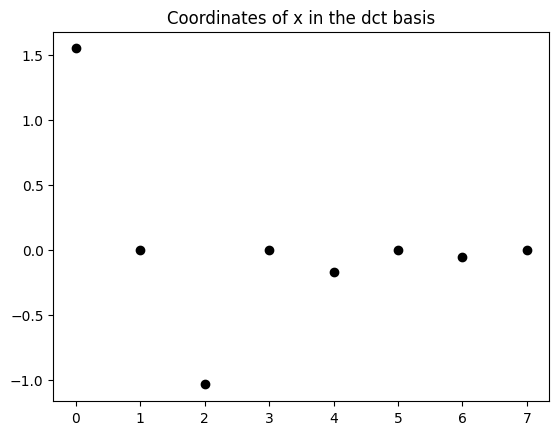

In [17]:
# Write your answer here
x_dct = D8.T @ x

plt.title('Coordinates of x in the dct basis')
plot_vector(x_dct)

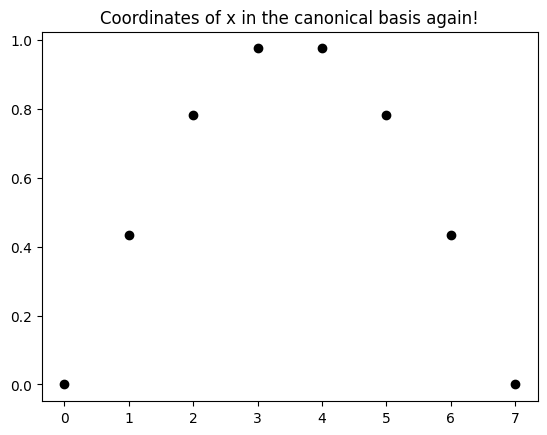

In [18]:
x = D8 @ x_dct

plt.title('Coordinates of x in the canonical basis again!')
plot_vector(x)

## 5.3.3 Image compression
In this section, we will use DCT modes to compress images. Let's use one of the template images of python.

Height: 768, Width: 1024


C:\Users\alexm\AppData\Local\Temp\ipykernel_20444\3842338847.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = scipy.misc.face(gray=True)


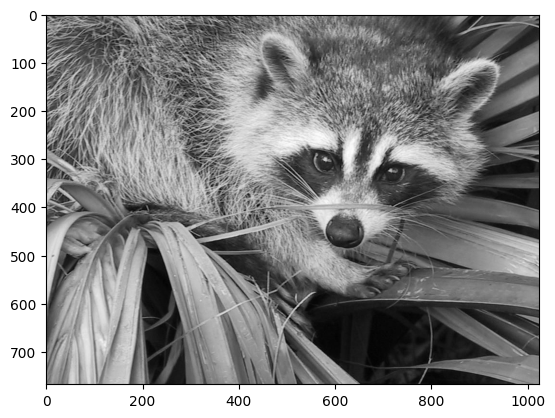

In [24]:
image = scipy.misc.face(gray=True)
h,w = image.shape
print(f'Height: {h}, Width: {w}')

plt.imshow(image)

**5.3 (c)** We will see each column of pixels as a vector in $\mathbb{R}^{768}$, and compute their coordinates in the DCT basis of $\mathbb{R}^{768}$. Plot the entries of `x`, the first column of our image.

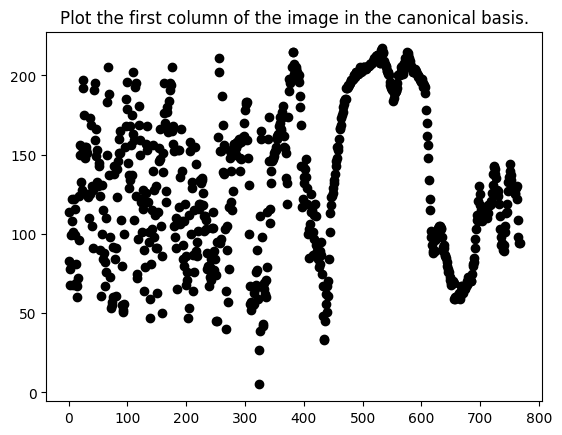

In [44]:
# Your answer here
plt.title('Plot the first column of the image in the canonical basis.')
plot_vector(image[:,0])

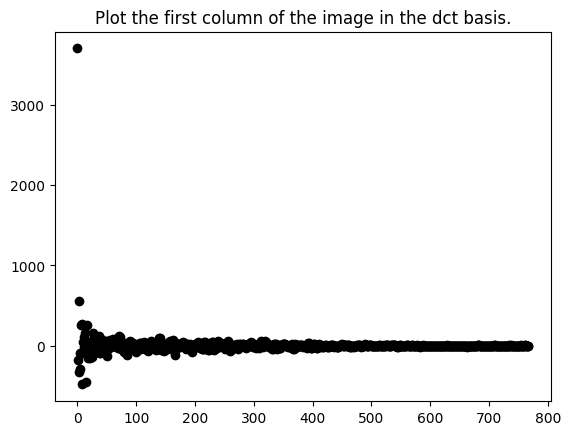

In [45]:
D768 = dct(768)
plt.title('Plot the first column of the image in the dct basis.')
plot_vector(D768.T @ image[:,0])

**5.3 (d)** Compute the 768 x 1024 matrix `dct_coeffs` whose columns are the DCT coefficients of the columns of `image`. Plot a histogram of their magnitudes using `plt.hist`.

(array([   689.,    844.,    890.,    973.,   1243.,   1452.,   1717.,
          2170.,   2495.,   3000.,   3809.,   4762.,   6095.,   7556.,
          9500.,  12470.,  16127.,  21415.,  29855.,  45333., 130007.,
        240372.,  73255.,  36979.,  25785.,  18809.,  14493.,  11133.,
          8702.,   6732.,   5336.,   4294.,   3511.,   2785.,   2268.,
          1817.,   1582.,   1333.,   1111.,   1041.,    817.,    709.,
           648.]),
 array([-106.44312388, -101.44312388,  -96.44312388,  -91.44312388,
         -86.44312388,  -81.44312388,  -76.44312388,  -71.44312388,
         -66.44312388,  -61.44312388,  -56.44312388,  -51.44312388,
         -46.44312388,  -41.44312388,  -36.44312388,  -31.44312388,
         -26.44312388,  -21.44312388,  -16.44312388,  -11.44312388,
          -6.44312388,   -1.44312388,    3.55687612,    8.55687612,
          13.55687612,   18.55687612,   23.55687612,   28.55687612,
          33.55687612,   38.55687612,   43.55687612,   48.55687612,
          5

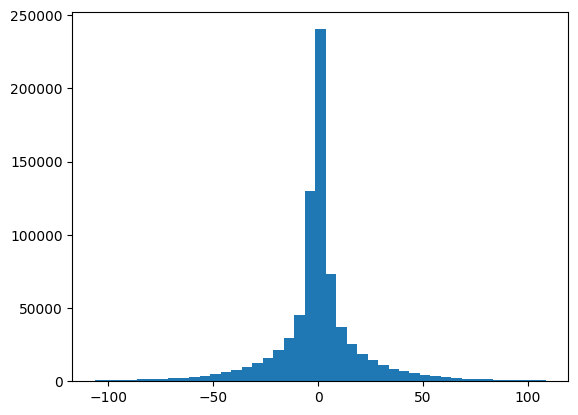

In [65]:
# Your answer here
dct_coeffs = D768.T @ image
dct_coeffs_flat = dct_coeffs.flatten()
data_min = np.min(dct_coeffs_flat) / 10
data_max = np.max(dct_coeffs_flat) / 40
w = 5
bin_edges = np.arange(start=data_min, stop=data_max + w, step=w)
plt.hist(dct_coeffs.flatten(),bins=bin_edges)

Since a large fraction of the DCT coefficients seems to be negligible, we see that the vector `x` can be well approximated by a linear combination of a small number of discrete cosines vectors.

Hence, we can "compress" the image by only storing the few DCT coefficients with the largest magnitude.

For instance, to reduce the size by $98\%$, we store only the top $2\%$ largest (in absolute value) coefficients of `wavelet_coeffs`.

**5.3 (e)** Compute a matrix `thres_coeffs` which is the matrix `dct_coeffs` where about $98\%$ smallest entries have been put to 0.

In [69]:
# Your answer here
# Flatten and sort the matrix(in the ascending order)
sorted_coeffs = np.sort(np.abs(dct_coeffs).flatten())

# Input the threshold
threshold_index = int(0.98 * len(sorted_coeffs))
threshold_value = sorted_coeffs[threshold_index]

# Set values below the threshold to 0
thres_coeffs = np.where(np.abs(dct_coeffs) < threshold_value, 0, dct_coeffs)

thres_coeffs

array([[3697.60371463, 3687.50008492, 3683.24212669, ..., 2767.52851536,
        2777.70431385, 2782.39528479],
       [-170.00988   , -147.53068464,    0.        , ..., -294.3850494 ,
        -295.07337131, -294.44949706],
       [-320.49471312, -322.25987969, -322.86057333, ...,  155.39217275,
         159.72835212,  162.24937077],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

**5.3 (f)** Compute and plot the `compressed_image` corresponding to `thres_coeffs`.

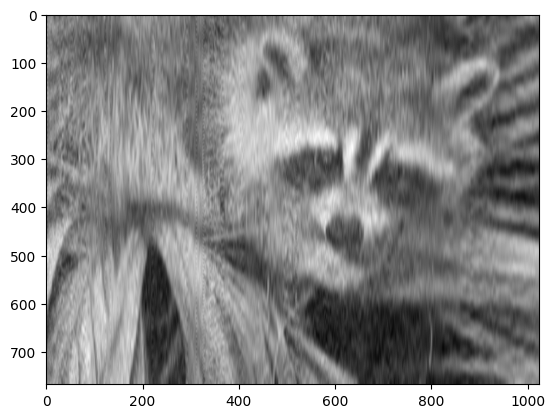

In [74]:
# Your answer here
plt.imshow(D768 @ thres_coeffs)